In [90]:
#Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle


In [25]:
#Data Analysis
#Loading the dataset into pandas df
diabetes_data = pd.read_csv('/content/diabetes_dataset_from_kaggle.csv')

In [26]:
#Loading the first 5 rows of the df
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
#Checking if there are any missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
#More info about the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
#Checking the no. of outcomes
# 1 --> Diabetic
# 2 --> Non Diabetic
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [30]:
#The outcomes or dataset are imbalanced

In [31]:
#Visualizing the dataset using sns heatmap
correlation = diabetes_data.corr()

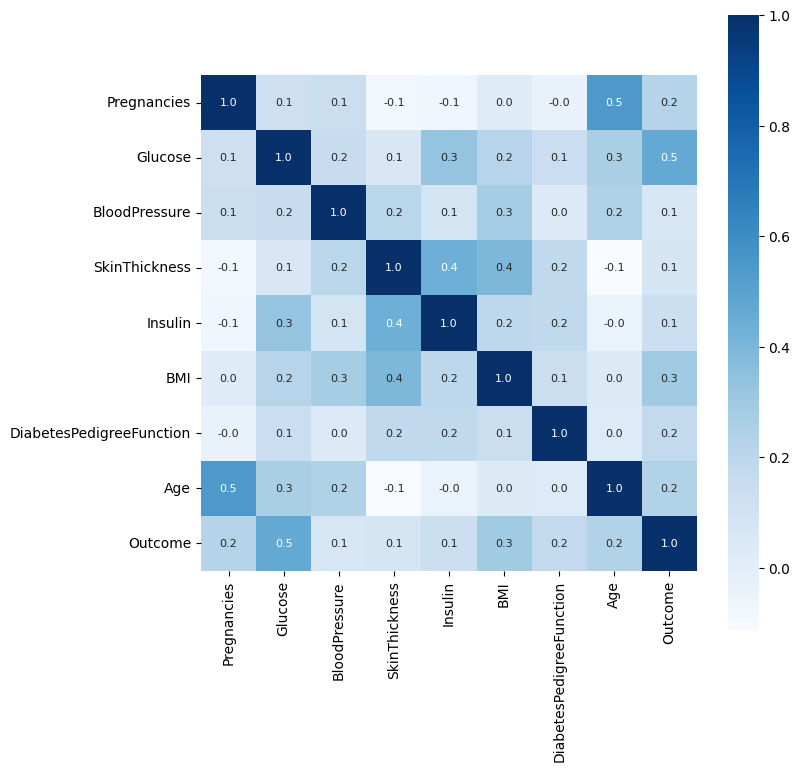

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [33]:
#The glucose has the highest correlation and some features are has a low correlation to the outcome.
#But even though they have low correlations to the outcome this doesnt mean that they have to be drop or not helpful
#to the model predictions.

In [34]:
#Splitting the features from the label
X = diabetes_data.drop(columns='Outcome', axis=1) #dropping the label column to get the features
Y = diabetes_data['Outcome']

In [35]:
#Converting the X and Y to np array for faster calculations and more data manipulations
X = np.asarray(X)
Y = np.asarray(Y)

In [36]:
#Standardizing the X for faster the convergence of the model
#Using the standard scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [37]:
X_std.std()

1.0

In [38]:
#Splitting the data into the training and test dataset using train test split
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.2, random_state=2, stratify=Y)

In [39]:
print(X_std.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(768, 8) (614, 8) (154, 8) (614,) (154,)


In [40]:
#fitting the data using the 4 algorithms
lr_model = LogisticRegression()
sv_model = SVC(kernel='linear')
kn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()


In [41]:
#Model training
lr_model.fit(x_train, y_train)
sv_model.fit(x_train, y_train)
kn_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
#Model evaluation
#Prediction and accuracies of the training and test data
predict_lr_train = lr_model.predict(x_train)
predict_lr_test = lr_model.predict(x_test)

predict_sv_train = sv_model.predict(x_train)
predict_sv_test = sv_model.predict(x_test)

predict_kn_train = kn_model.predict(x_train)
predict_kn_test = kn_model.predict(x_test)

predict_rf_train = rf_model.predict(x_train)
predict_rf_test = rf_model.predict(x_test)

In [43]:
#Accuracy Scores
accuracy_lr_train = accuracy_score(predict_lr_train, y_train)
accuracy_lr_test = accuracy_score(predict_lr_test, y_test)

accuracy_sv_train = accuracy_score(predict_sv_train, y_train)
accuracy_sv_test = accuracy_score(predict_sv_test, y_test)

accuracy_kn_train = accuracy_score(predict_kn_train, y_train)
accuracy_kn_test = accuracy_score(predict_kn_test, y_test)

accuracy_rf_train = accuracy_score(predict_rf_train, y_train)
accuracy_rf_test = accuracy_score(predict_rf_test, y_test)

In [44]:
#Printing the accuracy scores of the models
print('The Accuracy Scores of the Logistic Regression: ')
print('Train: ', accuracy_lr_train)
print('Test: ', accuracy_lr_test)
print('-----------------------------------------------------')
print('The Accuracy Scores of the Support Vector Classifier: ')
print('Train: ', accuracy_sv_train)
print('Test: ', accuracy_sv_test)
print('-----------------------------------------------------')
print('The Accuracy Scores of the KNearest Neighbors Classifier: ')
print('Train: ', accuracy_kn_train)
print('Test: ', accuracy_kn_test)
print('-----------------------------------------------------')
print('The Accuracy Scores of the Random Forest Classifier: ')
print('Train: ', accuracy_rf_train)
print('Test: ', accuracy_rf_test)
print('-----------------------------------------------------')

The Accuracy Scores of the Logistic Regression: 
Train:  0.7850162866449512
Test:  0.7597402597402597
-----------------------------------------------------
The Accuracy Scores of the Support Vector Classifier: 
Train:  0.7866449511400652
Test:  0.7727272727272727
-----------------------------------------------------
The Accuracy Scores of the KNearest Neighbors Classifier: 
Train:  0.8289902280130294
Test:  0.7207792207792207
-----------------------------------------------------
The Accuracy Scores of the Random Forest Classifier: 
Train:  1.0
Test:  0.7337662337662337
-----------------------------------------------------


In [47]:
#Training data highest accuracy: Random Forest Classifier
#Test data highest accuracy: Support Vector Classifier

In [45]:
#Even though accuracy score is a common metrics for the classification model. I remember that it is not a reliable metrics
#if our dataset is imbalanced. So, in this case the diabetes dataset is imbalanced.

In [46]:
#I will use the cross validation technique to check the generalization of the 4 models.
#And also to choose which will be the best model for our problem or dataset.

In [48]:
#Cross Validation
cv_score_lr = cross_val_score(lr_model, X_std, Y, cv=5)
cv_score_sv = cross_val_score(sv_model, X_std, Y, cv=5)
cv_score_kn = cross_val_score(kn_model, X_std, Y, cv=5)
cv_score_rf = cross_val_score(rf_model, X_std, Y, cv=5)

In [49]:
#Cross validation score into its mean score
mean_score_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_score_lr = mean_score_lr * 100
mean_score_lr = round(mean_score_lr, 2)

mean_score_sv = sum(cv_score_sv)/len(cv_score_sv)
mean_score_sv = mean_score_sv * 100
mean_score_sv = round(mean_score_sv, 2)

mean_score_kn = sum(cv_score_kn)/len(cv_score_kn)
mean_score_kn = mean_score_kn * 100
mean_score_kn = round(mean_score_kn, 2)

mean_score_rf = sum(cv_score_rf)/len(cv_score_rf)
mean_score_rf = mean_score_rf * 100
mean_score_rf = round(mean_score_rf, 2)

In [51]:
#Cross validation scores of the models
print('Logistic Regression cv score: ', cv_score_lr)
print('Logistic Regression cv mean score: ', mean_score_lr)
print('-------------------------------------------------------')
print('Support Vector Classifier cv score: ', cv_score_sv)
print('Support Vector Classifier cv mean score: ', mean_score_sv)
print('-------------------------------------------------------')
print('KNearest Neighbors Classifier cv score: ', cv_score_kn)
print('KNearest Neighbors Classifier cv mean score: ', mean_score_kn)
print('-------------------------------------------------------')
print('Random Forest Classifier cv score: ', cv_score_rf)
print('Random Forest Classifier cv mean score: ', mean_score_rf)
print('-------------------------------------------------------')

Logistic Regression cv score:  [0.77272727 0.74675325 0.75324675 0.81699346 0.76470588]
Logistic Regression cv mean score:  77.09
-------------------------------------------------------
Support Vector Classifier cv score:  [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Support Vector Classifier cv mean score:  77.35
-------------------------------------------------------
KNearest Neighbors Classifier cv score:  [0.72077922 0.73376623 0.71428571 0.77124183 0.7254902 ]
KNearest Neighbors Classifier cv mean score:  73.31
-------------------------------------------------------
Random Forest Classifier cv score:  [0.75324675 0.75974026 0.74025974 0.82352941 0.75816993]
Random Forest Classifier cv mean score:  76.7
-------------------------------------------------------


In [52]:
#Highest cross validation score: Support Vector Classifier

In [53]:
#Now, I will choose the support vector classifier algorithm to find what is the optimum hyperparameters
#for it and to see what will be the performance of the model if the hyperparameters are tuned.

In [55]:
#Hyperparameters tuning - SVC
hyperparameters = {
                    'kernel':[
                        'linear', 'poly', 'rbf', 'sigmoid'
                    ],
                    'C':[
                        1,5,10,15,20
                    ]
}

In [56]:
#I will use the grid search algorithm to find the optimum hyperparameters for the SVC model
classifier = GridSearchCV(sv_model, hyperparameters, cv=5)

In [57]:
classifier.fit(X_std, Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [58]:
#Grid search results
classifier.cv_results_

{'mean_fit_time': array([0.02842722, 0.02293344, 0.02114124, 0.0251514 , 0.05752482,
        0.03687115, 0.02610617, 0.02193613, 0.08386345, 0.06144161,
        0.02934813, 0.02057805, 0.1146286 , 0.08051047, 0.0333858 ,
        0.02199502, 0.15496302, 0.08724647, 0.03606005, 0.01967692]),
 'std_fit_time': array([0.00366088, 0.00092664, 0.00029607, 0.00270272, 0.00407922,
        0.00511175, 0.00083104, 0.00242264, 0.00825361, 0.00487872,
        0.00088237, 0.00159809, 0.01461657, 0.01827536, 0.00182503,
        0.00297554, 0.01723106, 0.01966962, 0.00153363, 0.00091906]),
 'mean_score_time': array([0.00462947, 0.00449352, 0.00746937, 0.00569944, 0.00403132,
        0.00415511, 0.00946803, 0.00556788, 0.00393152, 0.00479097,
        0.00815005, 0.00517755, 0.00400853, 0.0049571 , 0.00704117,
        0.00528326, 0.00393767, 0.00422654, 0.00804663, 0.0049684 ]),
 'std_score_time': array([1.14305687e-03, 1.71489722e-04, 3.84642354e-04, 1.85555677e-04,
        3.01642437e-04, 3.97276826e-

In [59]:
#Loading the results into pandas df
results_df = pd.DataFrame(classifier.cv_results_)

In [60]:
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028427,0.003661,0.004629,0.001143,1,linear,"{'C': 1, 'kernel': 'linear'}",0.766234,0.759740,0.759740,0.816993,0.764706,0.773483,0.021911,2
1,0.022933,0.000927,0.004494,0.000171,1,poly,"{'C': 1, 'kernel': 'poly'}",0.740260,0.772727,0.720779,0.764706,0.745098,0.748714,0.018424,11
2,0.021141,0.000296,0.007469,0.000385,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.766234,0.753247,0.746753,0.810458,0.777778,0.770894,0.022488,8
3,0.025151,0.002703,0.005699,0.000186,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.681818,0.701299,0.707792,0.718954,0.725490,0.707071,0.015179,16
4,0.057525,0.004079,0.004031,0.000302,5,linear,"{'C': 5, 'kernel': 'linear'}",0.766234,0.759740,0.759740,0.816993,0.764706,0.773483,0.021911,2


In [62]:
#Loading the results for the C, Kernel and mean test score
grid_search_df = results_df[['param_C', 'param_kernel', 'mean_test_score']]

In [67]:
#pandas df of 20 rows
grid_search_df.head(n=20)

,param_C,param_kernel,mean_test_score
0,1,linear,0.773483
1,1,poly,0.748714
2,1,rbf,0.770894
3,1,sigmoid,0.707071
4,5,linear,0.773483
5,5,poly,0.759138
6,5,rbf,0.777455
7,5,sigmoid,0.692743
8,10,linear,0.773483
9,10,poly,0.742212


In [69]:
#The best hyperparameters for the SVC
classifier.best_params_

{'C': 5, 'kernel': 'rbf'}

In [70]:
#The highest test score for the SVC
classifier.best_score_

0.777455224514048

In [71]:
#Based on the results of the best params, best score and data frame cv results, the best parameters and score for the SVC are
#C:5 and kernel:rbf
#77.74%

In [72]:
#Now, I will train the SVC model using these parameters to see if our model is performing better

In [73]:
best_model = SVC(kernel='rbf', C=5)

In [74]:
best_model.fit(x_train, y_train)

SVC(C=5)

In [75]:
#Prediction and accuracy score of the tuned svc model
prediction_best_train = best_model.predict(x_train)
prediction_best_test = best_model.predict(x_test)

accuracy_best_train = accuracy_score(prediction_best_train, y_train)
accuracy_best_test = accuracy_score(prediction_best_test, y_test)

In [77]:
print('New - Training Data: ', accuracy_best_train)
print('New - Test Data: ', accuracy_best_test)

New - Training Data:  0.8680781758957655
New - Test Data:  0.7142857142857143


In [84]:
#Old accuracy score result of the svc model
print('Old - Training Data: ', accuracy_sv_train)
print('Old - Test Data: ', accuracy_sv_test)

Old - Training Data:  0.7866449511400652
Old - Test Data:  0.7727272727272727


In [79]:
#Based on the results the new model is overfitting
#Highest Train Score: New SVC model
#Highest Test Score: Old SVC model

In [81]:
#Now, I will test the new model again in cross validation for its generalization
new_cv_score = cross_val_score(best_model, X_std, Y, cv=5)

In [82]:
new_mean_score = sum(new_cv_score)/len(new_cv_score)
new_mean_score = new_mean_score * 100
new_mean_scoe = round(new_mean_score, 2)

In [83]:
#Cv score and the mean of cv score of the new svc model
print('New SVC Model - CV Score: ', new_cv_score)
print('New SVC Model - Mean Score: ', new_mean_score)

New SVC Model - CV Score:  [0.74675325 0.75324675 0.74675325 0.83006536 0.81045752]
New SVC Model - Mean Score:  77.74552245140481


In [85]:
#Old cv and mean score of the svc model
print('Old - Support Vector Classifier cv score: ', cv_score_sv)
print('Old - Support Vector Classifier cv mean score: ', mean_score_sv)

Old - Support Vector Classifier cv score:  [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Old - Support Vector Classifier cv mean score:  77.35


In [86]:
#Based on the results the new cv score of the new svc model is higher but not much

In [88]:
#I will test the new svc model again using the confusion matrix metrics
cm_train = confusion_matrix(prediction_best_train, y_train)
cm_test = confusion_matrix(prediction_best_test, y_test)

In [89]:
print(cm_train)
print(cm_test)

[[376  57]
 [ 24 157]]
[[86 30]
 [14 24]]


<Axes: >

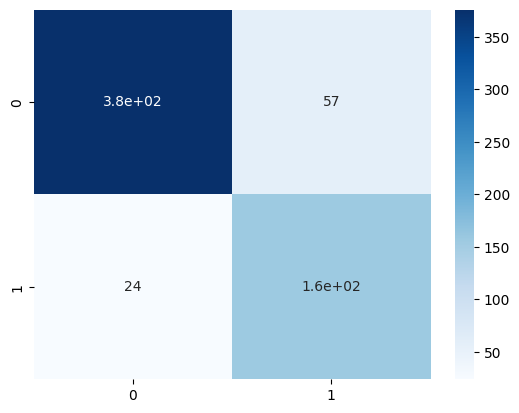

In [93]:
#Visualizing the confusion matrix
sns.heatmap(cm_train, cmap='Blues', annot=True)

<Axes: >

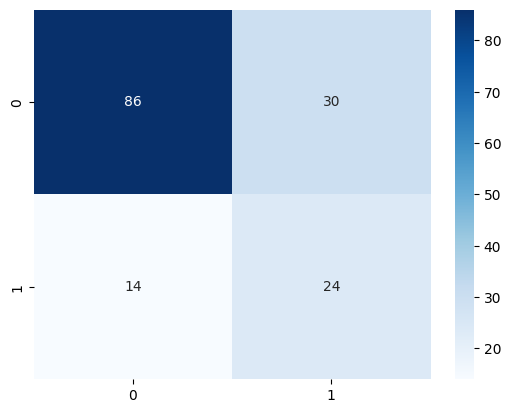

In [94]:
sns.heatmap(cm_test, cmap='Blues', annot=True)

In [95]:
#Based on the confusion matrix, the new svc model has a higher false positive than the false negative

In [96]:
#I will test the model again using the f1 score, the harmonic mean of the precision and recall scores
f1_train = f1_score(prediction_best_train, y_train)
f1_test = f1_score(prediction_best_test, y_test)

In [97]:
print(f1_train)
print(f1_test)

0.7949367088607595
0.5217391304347826


In [98]:
#We can see that the new svc model is better at performing in the training data while lower on the testing data
#The model is experiencing overfitting

In [99]:
#It seems that even though it is the best hyperparameters, it is not performing well.

In [100]:
#Now, I will train a model again. Based on my observation in the grid search results, it has a potential
#for performing better predictions

In [101]:
#Training SVC - Kernel: Linear - C: 1
linear_svc = SVC(kernel='linear', C=1)

In [103]:
linear_svc.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [105]:
#Now, I will test it with the accuracy score

In [106]:
linear_prediction_train = linear_svc.predict(x_train)
linear_prediction_test = linear_svc.predict(x_test)

In [107]:
linear_accuracy_train = accuracy_score(linear_prediction_train, y_train)
linear_accuracy_test = accuracy_score(linear_prediction_test, y_test)

In [108]:
print('Accuracy Score - linear train: ', linear_accuracy_train)
print('Accuracy Score - linear test: ', linear_accuracy_test)

Accuracy Score - linear train:  0.7866449511400652
Accuracy Score - linear test:  0.7727272727272727


In [109]:
#Comparing it to the other accuracy scores
print(accuracy_sv_train)
print(accuracy_sv_test)
print('----------')
print(accuracy_best_train)
print(accuracy_best_test)

0.7866449511400652
0.7727272727272727
----------
0.8680781758957655
0.7142857142857143


In [110]:
#Even though the 'linear' svc model has a lower accuracy score than the 2 but it is also the highest test accuracy score
#And based on the accuracy score, it seems the model is not overfitting but I will test it again on the cv score

In [111]:
#Cross validation score of the 'linear' svc model
linear_cv_score = cross_val_score(linear_svc, X_std, Y, cv=5)

In [112]:
linear_mean_score = sum(linear_cv_score)/len(linear_cv_score)
linear_mean_score = linear_mean_score * 100
linear_mean_score = round(linear_mean_score, 2)

In [113]:
#The cv and cv mean score
print('CV Score: ', linear_cv_score)
print('Mean CV Score: ', linear_mean_score)

CV Score:  [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Mean CV Score:  77.35


In [114]:
#Comparing to the 2 old models
print(cv_score_sv)
print(mean_score_sv)
print('--------------')
print(new_cv_score)
print(new_mean_score)

[0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
77.35
--------------
[0.74675325 0.75324675 0.74675325 0.83006536 0.81045752]
77.74552245140481


In [115]:
#It has the same cv and mean cv score of the 1st model

In [116]:
#Testing now using the f1 score
#linear model
f1_linear_train = f1_score(linear_prediction_train, y_train)
f1_linear_test = f1_score(linear_prediction_test, y_test)

#1st model
f1_first_train = f1_score(predict_sv_train, y_train)
f1_first_test = f1_score(predict_sv_test, y_test)

In [117]:
#The results of the f1 scores of 3 svc trained models
print('F1 First Train: ', f1_first_train)
print('F1 First Test: ', f1_first_test)
print('---------------------------------------')
print('F1 Best Train: ', f1_train)
print('F1 Best Test: ', f1_test)
print('---------------------------------------')
print('F1 Linear Train: ', f1_linear_train)
print('F1 Linear Test: ', f1_linear_test)

F1 First Train:  0.6579634464751958
F1 First Test:  0.6153846153846154
---------------------------------------
F1 Best Train:  0.7949367088607595
F1 Best Test:  0.5217391304347826
---------------------------------------
F1 Linear Train:  0.6579634464751958
F1 Linear Test:  0.6153846153846154


In [118]:
#The linear model has the same results as the 1st model 'rbf'

In [120]:
#Conclusion:
#   It seems that the svc model has reached its maximum potential on a imbalanced dataset
#   I think the solution is to have more data and also to solve the imbalanced dataset
#   After that, select a few more classification models based on the problem, data, and the expected outcome

In [121]:
#Note:
#   I am a beginner learner in machine learning, can you please give me an insights and opinions based on this?
#   Thank you very much. I hope all of you has benefit to this project.